In [ ]:
import pandas as pd

In [ ]:
df1 = pd.read_excel("/content/drive/MyDrive/Colab/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Aracaju.xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/Colab/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Fortaleza.xlsx")
df3 = pd.read_excel("/content/drive/MyDrive/Colab/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Natal.xlsx")
df4 = pd.read_excel("/content/drive/MyDrive/Colab/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Recife.xlsx")
df5 = pd.read_excel("/content/drive/MyDrive/Colab/Cusro_Python_Pandas_Digital_Innovation-master/datasets/Salvador.xlsx")


In [ ]:
df = pd.concat([df1,df2,df3,df4,df5])

In [ ]:
df['LojaID'] = df['LojaID'].astype('object')

In [ ]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
df['Vendas'].fillna(df['Vendas'].mean(), inplace=True)

In [ ]:
df['Receita'] = df['Vendas'].mul(df['Qtde'])

In [ ]:
df.nlargest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [ ]:
df.nsmallest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [ ]:
df.groupby('Cidade')['Receita'].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [ ]:
df.sort_values('Receita', ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


In [18]:
df['Data'] = df['Data'].astype('int64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  """Entry point for launching an IPython kernel.


In [19]:
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
Receita    float64
dtype: object

In [21]:
df['Data'] = pd.to_datetime(df['Data'])

In [22]:
df.groupby(df['Data'].dt.year)['Receita'].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [23]:
df['Ano_Venda'] = df['Data'].dt.year

In [24]:
df['mes_venda'], df['dia_venda'] = (df['Data'].dt.month, df['Data'].dt.day)

In [25]:
df['Diferenca_dias'] = df['Data'] - df['Data'].min()

In [27]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,mes_venda,dia_venda,Diferenca_dias
87,Aracaju,2018-01-01,116.71,1520,4,466.84,2018,1,1,0 days
153,Natal,2019-01-02,17.41,1035,2,34.82,2019,1,2,366 days
54,Salvador,2019-01-01,46.54,1037,3,139.62,2019,1,1,365 days
36,Natal,2019-02-09,328.00,853,2,656.00,2019,2,9,404 days
119,Salvador,2019-03-02,136.37,1034,2,272.74,2019,3,2,425 days


In [28]:
df['trimestre_venda'] = df['Data'].dt.quarter

In [31]:
vendas_marco_19 = df.loc[(df['Data'].dt.year == 2019) & (df['Data'].dt.month == 3)]

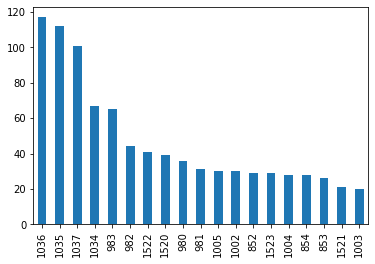

In [36]:
df['LojaID'].value_counts(ascending=False).plot.bar();

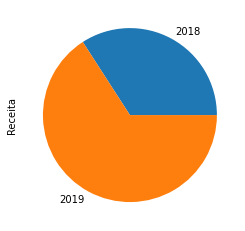

In [38]:
df.groupby(df['Data'].dt.year)['Receita'].sum().plot.pie();

In [39]:
df['Cidade'].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

In [43]:
import matplotlib.pyplot as plt

In [44]:
plt.style.use('ggplot')

Text(0, 0.5, 'Total vendas')

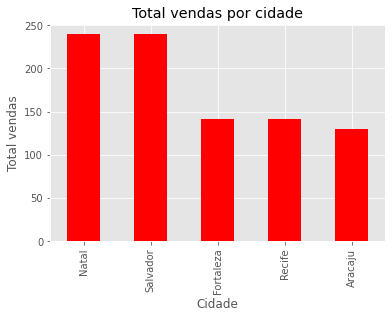

In [45]:
df['Cidade'].value_counts().plot.bar(title="Total vendas por cidade", color='red');
plt.xlabel('Cidade')
plt.ylabel('Total vendas')

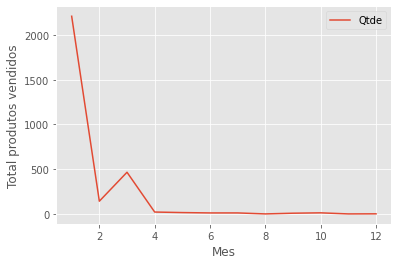

In [47]:
df.groupby(df['mes_venda'])['Qtde'].sum().plot()
plt.xlabel('Mes')
plt.ylabel('Total produtos vendidos')
plt.legend()

In [49]:
df_2019 = df[df['Ano_Venda']==2019]

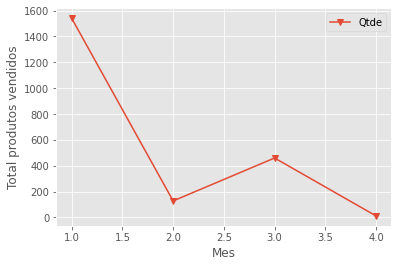

In [50]:
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(marker='v')
plt.xlabel('Mes')
plt.ylabel('Total produtos vendidos')
plt.legend()

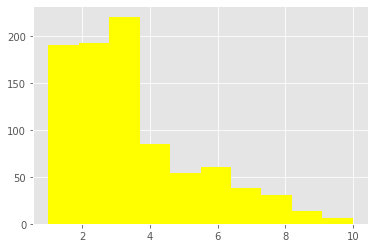

In [52]:
plt.hist(df['Qtde'], color='yellow');

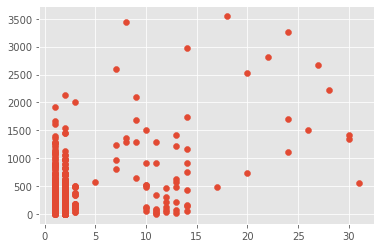

In [54]:
plt.scatter(x=df_2019['dia_venda'], y=df_2019['Receita']);